# The Multi-Tier Framework for measuring access to cooking solutions (Nepal)

### Preliminaries

According to [the MTF survey data](https://mtfenergyaccess.esmap.org/country/nepal), as of 2017, **62.7%** of Nepalese households **use a three-stone stove or traditional stove** as their primary stove and **26.3% use an LPG stove**.  Using the MTF definition, **25.7%** of the households in Nepal **are in MTF Tiers 3 or above.**

To learn more about energy access in Nepal, download MTF’s Country Diagnostic Report, [here](https://mtfenergyaccess.esmap.org/force-download/1527)

## General information

### Typologies of cookstoves

The various types of cookstove used in Nepal were classified into seven stove categories (see box 2 of the report for details & pictures):

- **Open fire biomass:** The most traditional method of cooking in Nepal. A pot is balanced on three stones over an open fire and fuel placed on the ground. 
- **Traditional biomass:** These are locally produced using available and low-cost materials and fuels, reflecting cultural practices. A Pot placed above fire on the enclosed combustion chamber while the fuel rests on ground.
- **Improved biomass:** The improved biomass stove uses newer stove technology compared to traditional stoves to improve efficiency, cleanliness, and safety. They may be built with local materials or be factory manufactured. In addition, improved biomass stoves may have some exhaust system.
- **Biogas:** The digester converts organic wastes and dung into combustible methane gas called biogas, which is piped from the digester to the cookstove.
- **Solar cookstoves:** Often called solar cookers, can be used in areas where solar energy is abundant for most of the year, typically between 30 degrees north and south of the equator. There are several types of solar cookers: panel cookers with a clamshell shape, box cookers that fully enclose the pot, parabolic cookers that resemble a satellite dish, and vacuum tube cookers that work like greenhouses.
- **Liquefied petroleum gas (LPG):** Exclusively burn LPG, which is a gaseous fuel obtained during petroleum refining and consists mainly of butane or propane. For distribution to the end-user, LPG is bottled in individual gas cylinders of various sizes (between 3 kg and 50 kg or larger).
- **Electric cookstoves:** Convert electrical energy into heat for cooking. Electric stoves can be either an induction type stove or an electric coil stove

> The last 4 are considered as clean stove types

## Analysis

Measuring access to modern energy cooking solutions in Nepal is crucial, as the country has historically relied heavily on solid biomass, and making concerted efforts to change this trend is key to numerous potential positive outcomes.

> The questions related to cooking are in the sections I & J. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from IPython.display import Image
import itertools
import warnings
warnings.filterwarnings('ignore')

In [20]:
main_dataset = pd.read_stata('raw_data/dta/maindataset.dta')

In [21]:
#Extracting columns corresponding to Household information and Cooking Questions (I & J Sections)
all_columns = main_dataset.columns
household_info_columns = all_columns[:19]

In [22]:
I_section = [column for column in all_columns if column.startswith('I')]
I_section = I_section[2:]
I_section.sort()

In [23]:
J_section = [column for column in all_columns if column.startswith('J')]
J_section.sort()

In [24]:
target_columns = list(itertools.chain(household_info_columns ,I_section ,J_section))

In [25]:
cooking = main_dataset[target_columns]

In [26]:
cooking.head()

,Unnamed: 0,HHID,Id,Date_HH_Visit,Eco_Reg,Province,Dev_Region,Zone,VDC_MUN,VDC_MUN_NAME,...,J3__4,J3__5,J3__6,J3__7,J3__8,J40,J41,J42,J43,J44
0,1,110148801,2cd3defe83504f3593c43b93509a4c9f,2017-11-11,1,1,1,1,1,Khewang,...,0,0,0,0,0,15.0,10.0,3.0,8.0,4.0
1,2,110148802,d85646020ba744eb9b1b4bf76ca4e454,2017-11-11,1,1,1,1,1,Khewang,...,0,0,0,0,0,6.0,9.0,1.0,5.0,2.0
2,3,110148803,d8612908fadc4ba58c01a706a7e5ef64,2017-11-11,1,1,1,1,1,Khewang,...,0,0,0,0,0,7.0,NaN,1.0,6.0,2.0
3,4,110148804,9157d2376525473f925444bf756cdbe7,2017-11-11,1,1,1,1,1,Khewang,...,0,0,0,0,0,9.0,6.0,1.0,5.0,3.0
4,5,110148805,b84e1ea7a450429c8a90de5f2a42fe4b,2017-11-11,1,1,1,1,1,Khewang,...,0,0,0,0,0,8.0,NaN,1.0,5.0,2.0


### Fuels used for cooking

In Nepal, households are still heavily reliant on biomass to meet their cooking needs. The share of the
total households using a fuel indicates the nationwide dependency on different fuel types. Firewood
is the most widely used source of cooking fuel.

As seen on the image below, the responses corresponding to this part are in section `I2` and up to 18 possible types were to be multiselected.

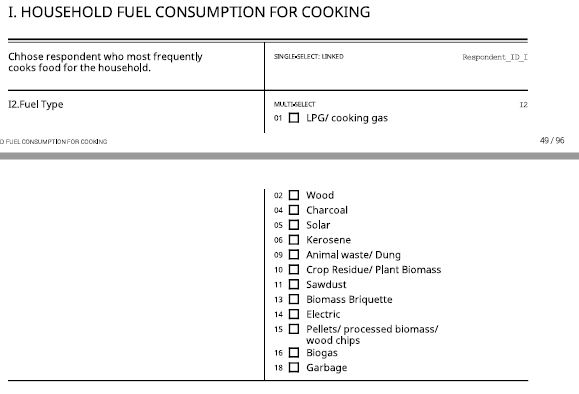

In [27]:
Image('references/fuel type.JPG')

In [28]:
#Extracting columns related to the fuel type
fuel_response_columns = [column for column in I_section if column.startswith('I2')]
fuel_type = cooking[fuel_response_columns]

In [29]:
fuel_type.head()

,I2__1,I2__10,I2__11,I2__13,I2__14,I2__15,I2__16,I2__18,I2__2,I2__4,I2__5,I2__6,I2__9
0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0


In [35]:
#Replacing the columns' name with corresponding fuel type in questionaire dictionary
columns_mapping = {'I2__1':'LPG/Cooking gas', 'I2__10':'Crop Residue/Plant Biomas', 'I2__11':'Sawdust',
                   'I2__13':'Biomas Briquette', 'I2__14':'Electric', 'I2__15':'Pellets/Processes biomass/wood chips',
                   'I2__16':'Biogas', 'I2__18':'Garbage', 'I2__2':'Wood', 'I2__4':'Charcoal', 'I2__5':'Solar',
                   'I2__6':'Kerosene', 'I2__9':'Animal waste/Dung'}
fuel_type = fuel_type.rename(columns = columns_mapping)

#Replacing the answer No with False and Yes with True to easy the calculations
#response_mapping = {'0':False, '1':True}
#fuel_type = fuel_type.replace(response_mapping)

In [36]:
fuel_type.head()

,LPG/Cooking gas,Crop Residue/Plant Biomas,Sawdust,Biomas Briquette,Electric,Pellets/Processes biomass/wood chips,Biogas,Garbage,Wood,Charcoal,Solar,Kerosene,Animal waste/Dung
0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0


In [37]:
#Calculating the percentage contribution and considering only the fuel type reported in the report
fuel_type_df = (fuel_type.sum()*100/6000).to_frame().reset_index().rename(columns = {'index':'Fuel Type', 0:'% Population'})

In [38]:
types_mapping = {'Electric':'Electric/Solar', 'Solar':'Electric/Solar', 'Animal waste/Dung':'Dung',
                'Crop Residue/Plant Biomas':'Crop residue', 'Pellets/Processes biomass/wood chips':'Processed biomas'}
fuel_type_df['Fuel Type'] = fuel_type_df['Fuel Type'].replace(types_mapping)

In [39]:
fuel_type_df = fuel_type_df.groupby(['Fuel Type']).sum().reset_index()

In [40]:
fuel_type_df = fuel_type_df[~fuel_type_df['Fuel Type'].isin(['Biomas Briquette','Kerosene','Garbage'])]

In [41]:
fuel_type_df['% Population'] = fuel_type_df['% Population'].apply(lambda x: round(x,1))

In [42]:
fuel_type_df

,Fuel Type,% Population
0,Biogas,1.9
2,Charcoal,0.2
3,Crop residue,1.2
4,Dung,3.3
5,Electric/Solar,0.5
8,LPG/Cooking gas,39.3
9,Processed biomas,0.1
10,Sawdust,0.2
11,Wood,68.5


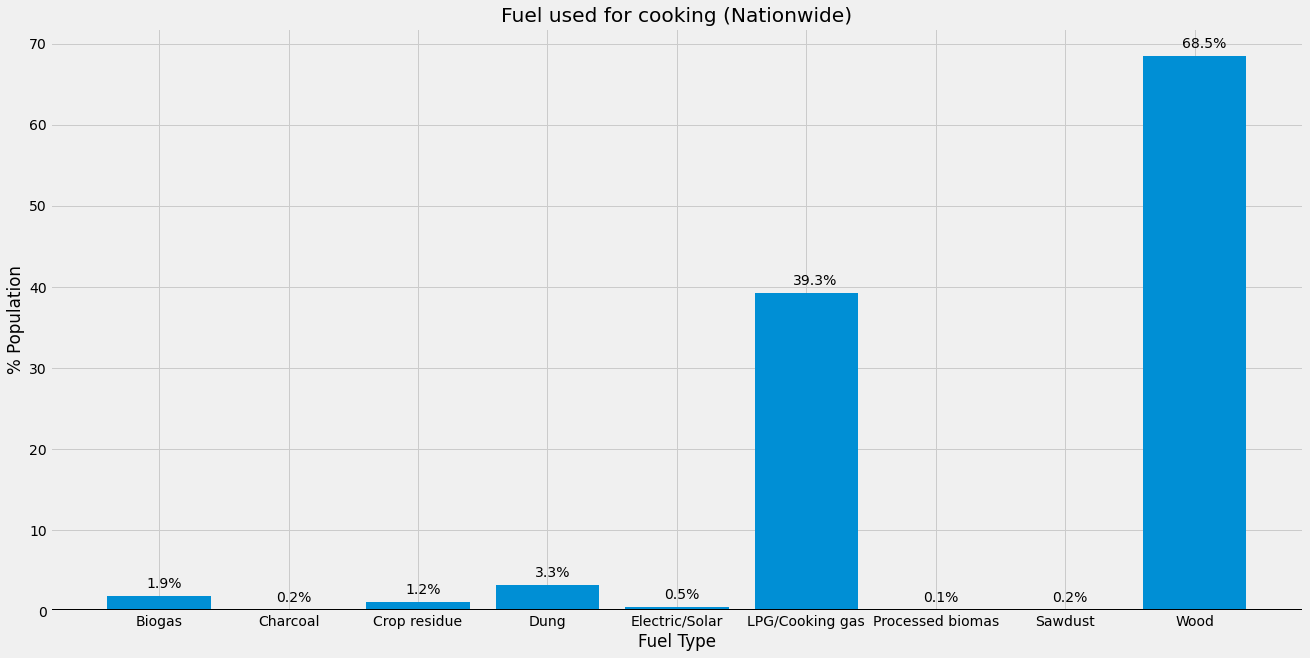

In [43]:
#Ploting the result
plt.figure(figsize = (20,10))
plt.bar(fuel_type_df['Fuel Type'], fuel_type_df['% Population']);
plt.axhline(0, color = 'black')
plt.title('Fuel used for cooking (Nationwide)')
plt.ylabel('% Population')
plt.xlabel('Fuel Type')
for i,pop in enumerate(fuel_type_df['% Population']):
    plt.text(i-0.1,pop+1, f'{pop}%')

> The numbers from this analysis are small compared to what is in the report!

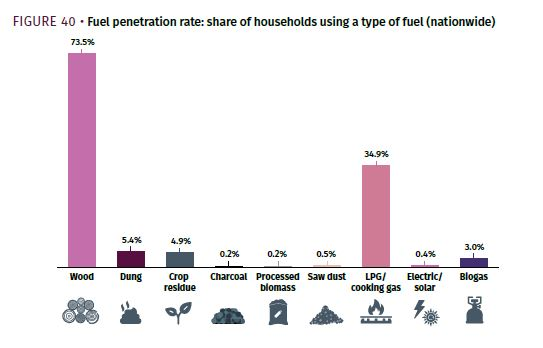

In [44]:
Image('references/Fuel penetration rate nationwide.JPG')

### Distribution of Primary Stoves (Urban - Rural)

In urban areas, about half of the households use a clean-fuel stove as their primary stove. Biomass stove users are the overwhelming majority in rural areas.

Answers related to this question is in Section J Question 3. Whether a household is in urban or rural area can be found in column `LOCALITY` of the main dataset.

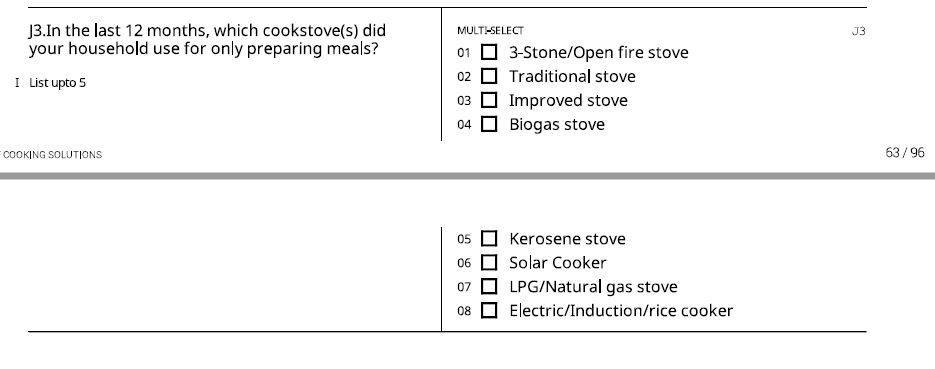

In [45]:
Image('references/cookstove(s) used for preparing meals.JPG')

In [52]:
cookstoves = pd.read_stata('raw_data/dta/J_Cookstove.dta')

In [53]:
cookstoves.head(2)

,HHID,Id,J4,J5,J6,J7,J7_SO,J7_SO_RECODE,J8,J9,...,J35__6,J35__7,J35__8,J35__9,J35__10,J35__555,J35_SO,J35_SO_RECODE,J37_A,J37_B
0,110148801,Improved stove,Receive for free,NaN,NaN,Friend/ relative,,,Yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,,0.0,NaN
1,110148802,3-Stone/Open fire stove,NaN,NaN,NaN,NaN,,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,,0.0,NaN


In [69]:
# Check if this is necessary in order to gather more stoves per households
import numpy as np
stove_labels = np.unique(cookstoves["Id"])
cookstoves.loc[cookstoves["HHID"]==row["HHID"]]
hh_stoves = []
for index,row in main_dataset.iterrows():
    
    df = cookstoves.loc[cookstoves["HHID"]==str(row["HHID"])]
    hh_stoves.append(df["Id"].tolist())

    
main_dataset["Stoves"]=hh_stoves
    


In [54]:
#Combining the cookstove types with localities using the HHID and counting the percentages in each locality
cookstoves_locality = pd.merge(cookstoves, main_dataset[['HHID','LOCALITY']], how = 'left', on = 'HHID')
cookstoves_locality = cookstoves_locality[['LOCALITY','Id']].groupby(['Id','LOCALITY']).size().unstack()
cookstoves_locality.columns = cookstoves_locality.columns.to_list() # Removing the categorical columns
cookstoves_locality.reset_index(inplace = True)


ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [26]:
#Mapping Ids to names used in the report & removing those with 0 or 1 frequency
ids_mapping = {'3-Stone/Open fire stove':'Open fire stove', 'Electric/Induction/rice cooker':'Electric'}
cookstoves_locality.replace(ids_mapping, inplace = True)
cookstoves_locality = cookstoves_locality[cookstoves_locality['Rural'] > 0]

In [27]:
#Finding the percentages
cookstoves_locality['Urban'] = round((cookstoves_locality['Urban']/sum(cookstoves_locality['Urban'])*100),1)
cookstoves_locality['Rural'] = round((cookstoves_locality['Rural']/sum(cookstoves_locality['Rural'])*100),1)
cookstoves_locality.set_index('Id', inplace = True)

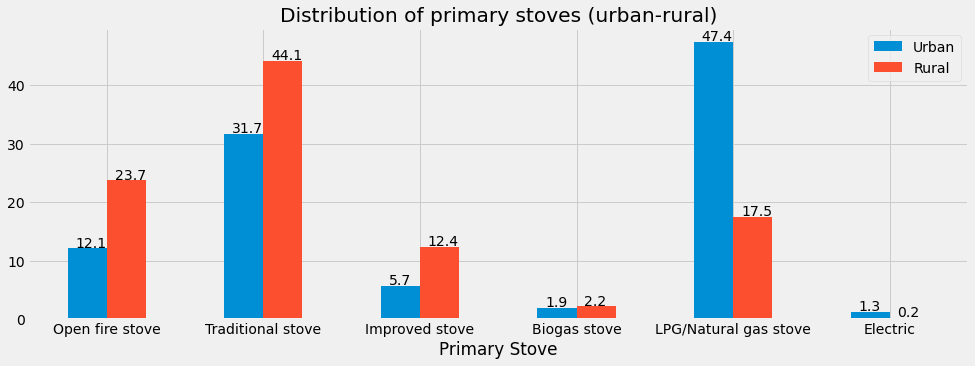

In [28]:
#Ploting
cookstoves_locality.plot.bar(figsize = (15,5))
urban = cookstoves_locality['Urban']
rural = cookstoves_locality['Rural']

for i in range(len(urban)):
    plt.text(i-0.2,urban[i] + 0.2, f'{urban[i]}')
    plt.text(i+0.05,rural[i] + 0.2, f'{rural[i]}')

plt.title('Distribution of primary stoves (urban-rural)')
plt.xlabel('Primary Stove')
plt.xticks(rotation = 0);

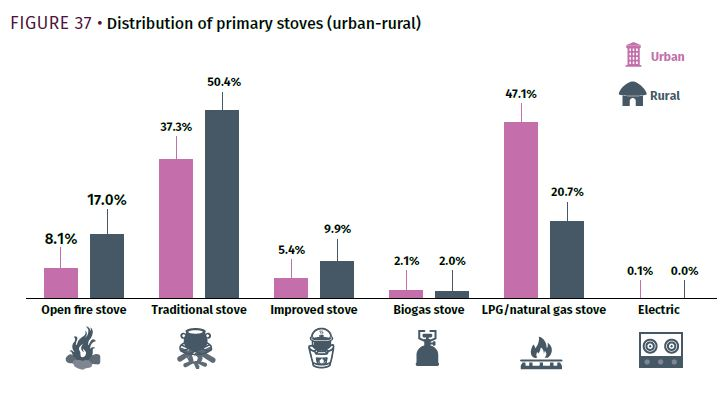

In [29]:
Image('references/Distribution of primary stoves.JPG')

> Values in the reports are higher except for the Electric and Open fire stove they are lower.

### Stove Stacking

While most of the households in Nepal use only one type of stove, there are some households that use two or more different types at the same time. Most households that stack use an LPG stove along with a biomass stove. The two most common forms of stacking are to use an LPG stove with a traditional stove or with an open fire stove. 

In [73]:
cookstoves_stack = (cookstoves['HHID'].value_counts().to_frame()['HHID'].value_counts(normalize=True, ascending = True)*100).to_frame()
cookstoves_stack.reset_index(inplace = True)
cookstoves_stack.columns = ['Number of stoves', '% Households']
cookstoves_stack.replace({1 : '1 Stove', 2 : '2 Stoves', 3 : '3 Stoves'}, inplace = True)
cookstoves_stack.set_index('Number of stoves', inplace = True)

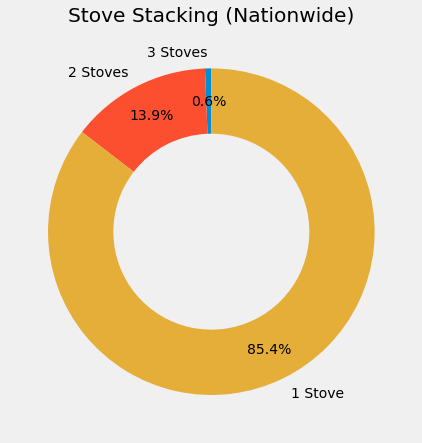

In [74]:
#Ploting
cookstoves_stack['% Households'].plot.pie(wedgeprops= {'width' :0.4}, startangle=90, figsize = (7,7),
                                          autopct = lambda p: f'{p:.1f}%', pctdistance=0.8);
plt.title('Stove Stacking (Nationwide)');
plt.ylabel('');

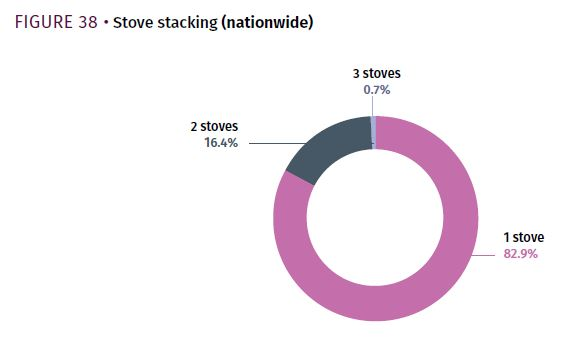

In [75]:
Image('references/Stove stacking nationwide.JPG')

> The values for 1 stove and for 2 stoves don't match those reported.

### Time needed for cooking



Question: *How much time do household members spend preparing the cookstove and fuel for each meal on average [including
setting up the fuel and turning on the stove but not including gathering fuel or cooking time]?* This question is found in J22

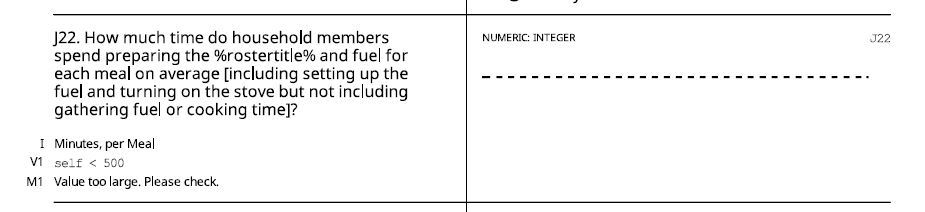

In [76]:
Image('references/time needed for cooking.JPG')

In [77]:
cookstoves.J22.value_counts().sort_index()

0.0     1730
1.0      286
2.0      189
3.0      124
4.0       98
5.0     1572
6.0       80
7.0      110
8.0      167
9.0       19
10.0    1314
11.0       8
12.0      63
13.0       7
14.0       4
15.0     650
16.0       2
17.0       1
18.0       3
20.0     295
22.0       1
25.0      88
30.0      63
35.0       6
40.0       1
45.0       3
50.0       5
55.0       1
60.0       9
65.0       2
70.0       1
75.0       1
80.0       1
90.0       6
Name: J22, dtype: int64

> The column J22 has up to 34 unique values, some close to each other. Let's put them into groups for better visualization.

In [78]:
#Grouping the required time
bins = [-1,5,10,20,30,40]
groups = ['0-5', '5-10', '10-20', '20-30','30+']
cookstoves['Time Required'] = pd.cut(cookstoves['J22'],bins, labels = groups)

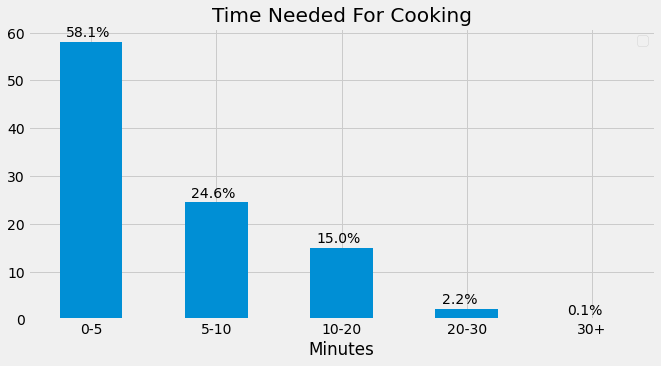

In [79]:
#Counting the groups & ploting
time_required = cookstoves['Time Required'].value_counts(normalize=True)*100
time_required.to_frame().plot(kind='bar', figsize = (10,5))
for i, values in enumerate(time_required.values):
    plt.text(i-0.2,values+1,f'{values:.1f}%')
plt.xticks(rotation = 0);
plt.legend([]);
plt.xlabel('Minutes');
plt.title('Time Needed For Cooking');


> On average, more than half uses 0 to 5 minutes to prepare the cookstove and fuel for each meal.